# Thinkful KNN Regression Notebook:

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [2]:
music.head()

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120


In [3]:
music.describe()

,duration,loudness,bpm
count,30.000000,30.000000,30.000000
mean,222.966667,21.900000,89.333333
std,92.743057,11.645185,15.563736
min,102.000000,4.000000,60.000000
25%,168.500000,13.250000,75.750000
50%,197.500000,19.500000,90.000000
75%,261.250000,27.750000,101.500000
max,403.000000,51.000000,120.000000


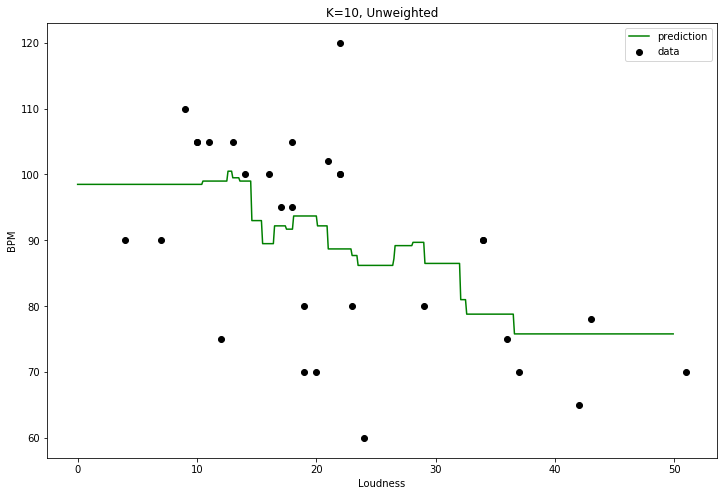

In [4]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.rcParams['figure.figsize'] = 12, 8
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Unweighted')
plt.show()

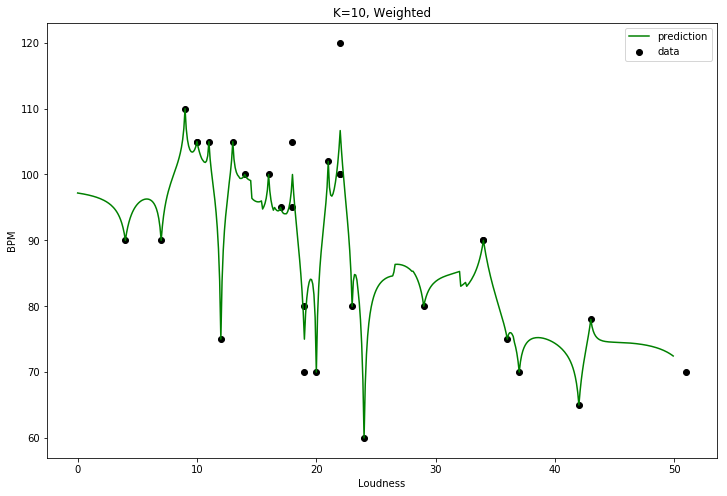

In [5]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.rcParams['figure.figsize'] = 12, 8
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


# Drill:

## Distributions:

In [7]:
def plotcolumn(plotterm, df=music):
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure()

    fig.add_subplot(231)
    plt.hist(df[plotterm])
    plt.title('{} Raw'.format(plotterm))

    fig.add_subplot(232)
    plt.hist(np.log(df[plotterm]+1))
    plt.title('{} Log'.format(plotterm))

    fig.add_subplot(233)
    plt.hist((df[plotterm])**2)
    plt.title('{} Square'.format(plotterm))
    
    fig.add_subplot(235)
    plt.hist(np.sqrt(df[plotterm]+1))
    plt.title('{} Square Root'.format(plotterm))
    
    ax3=fig.add_subplot(236)
    plt.hist(1/(df[plotterm]+1))
    plt.title('{} Inverse'.format(plotterm))
    plt.xticks(rotation=90)
    plt.show()

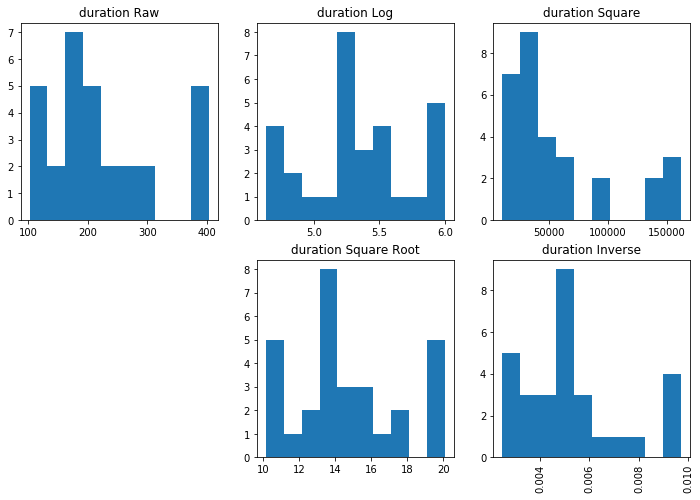

In [8]:
plotcolumn('duration')

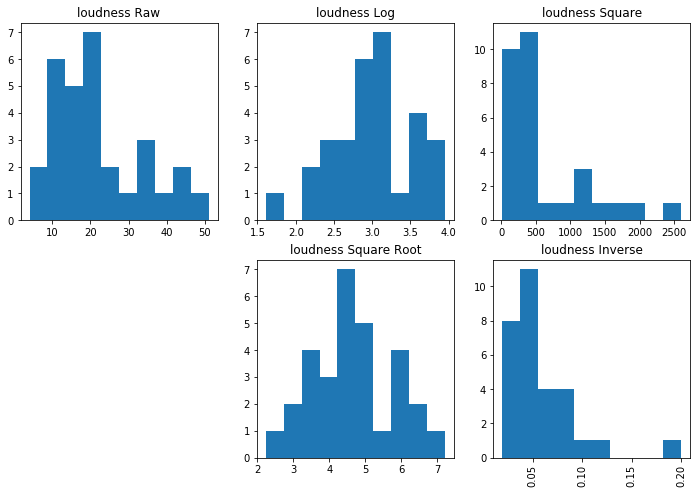

In [9]:
plotcolumn('loudness')

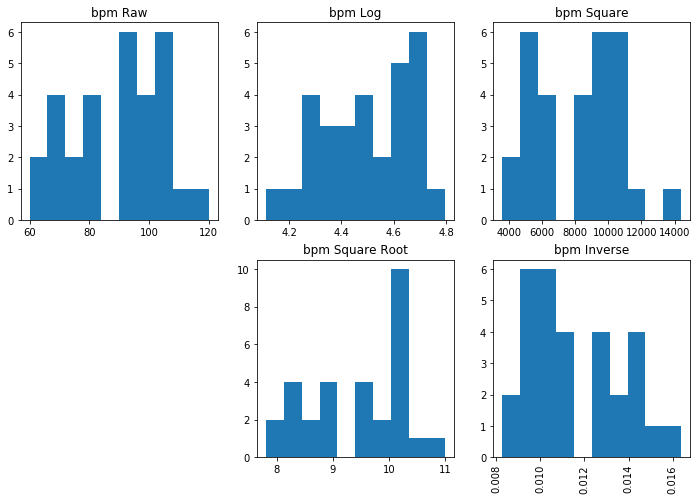

In [10]:
plotcolumn('bpm')

In [11]:
stats.pearsonr(music.bpm, music.loudness)

(-0.54813178761564629, 0.0017139787875130796)

In [12]:
stats.pearsonr(music.bpm, music.duration)

(-0.033007300831504029, 0.86253088356368834)

In [13]:
stats.pearsonr(music.loudness, music.duration)

(-0.10223722975727523, 0.59085723809269997)

In [14]:
music.corr()

,duration,loudness,bpm
duration,1.000000,-0.102237,-0.033007
loudness,-0.102237,1.000000,-0.548132
bpm,-0.033007,-0.548132,1.000000


## Iterations:

BPM and duration are barely correlated... why bother with KNN regression?

### Loudness Unweighted

Unweighted Accuracy: -0.94 (+/- 5.18) Neighbors: 1
Unweighted Accuracy: -0.40 (+/- 2.22) Neighbors: 2
Unweighted Accuracy: 0.07 (+/- 0.68) Neighbors: 3
Unweighted Accuracy: -0.04 (+/- 0.87) Neighbors: 4
Unweighted Accuracy: -0.28 (+/- 1.20) Neighbors: 5
Unweighted Accuracy: -0.18 (+/- 0.94) Neighbors: 6
Unweighted Accuracy: -0.25 (+/- 1.07) Neighbors: 7
Unweighted Accuracy: -0.25 (+/- 0.90) Neighbors: 8
Unweighted Accuracy: -0.18 (+/- 0.74) Neighbors: 9
Unweighted Accuracy: -0.18 (+/- 0.66) Neighbors: 10
Unweighted Accuracy: -0.09 (+/- 0.42) Neighbors: 11
Unweighted Accuracy: -0.10 (+/- 0.46) Neighbors: 12
Unweighted Accuracy: -0.08 (+/- 0.44) Neighbors: 13
Unweighted Accuracy: -0.06 (+/- 0.47) Neighbors: 14
Unweighted Accuracy: -0.09 (+/- 0.42) Neighbors: 15
Unweighted Accuracy: -0.04 (+/- 0.36) Neighbors: 16
Unweighted Accuracy: -0.05 (+/- 0.33) Neighbors: 17
Unweighted Accuracy: -0.04 (+/- 0.29) Neighbors: 18
Unweighted Accuracy: -0.07 (+/- 0.28) Neighbors: 19
Unweighted Accuracy: -

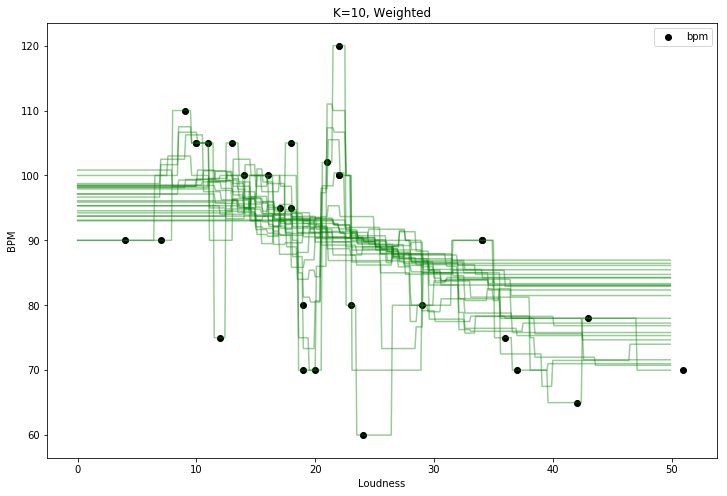

In [15]:
for n in range(1, 25):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    X = pd.DataFrame(music.loudness)
    Y = music.bpm
    knn.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    Y_ = knn.predict(T)

    plt.plot(T, Y_, c='g', alpha=0.4)

    score = cross_val_score(knn, X, Y, cv=5)
    print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2), 'Neighbors: {}'.format(n))

plt.scatter(X, Y, c='k')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

For unweighted bpm-loudness, 3 Neighbors has the maximum score.

### Loudness Distance-Weighted

Weighted Accuracy: -0.94 (+/- 5.18) Neighbors: 1
Weighted Accuracy: -0.27 (+/- 2.36) Neighbors: 2
Weighted Accuracy: 0.14 (+/- 0.84) Neighbors: 3
Weighted Accuracy: 0.16 (+/- 0.86) Neighbors: 4
Weighted Accuracy: 0.12 (+/- 0.93) Neighbors: 5
Weighted Accuracy: 0.17 (+/- 0.82) Neighbors: 6
Weighted Accuracy: 0.10 (+/- 0.98) Neighbors: 7
Weighted Accuracy: 0.10 (+/- 0.98) Neighbors: 8
Weighted Accuracy: 0.12 (+/- 0.93) Neighbors: 9
Weighted Accuracy: 0.11 (+/- 0.94) Neighbors: 10
Weighted Accuracy: 0.13 (+/- 0.87) Neighbors: 11
Weighted Accuracy: 0.13 (+/- 0.83) Neighbors: 12
Weighted Accuracy: 0.14 (+/- 0.80) Neighbors: 13
Weighted Accuracy: 0.14 (+/- 0.78) Neighbors: 14
Weighted Accuracy: 0.13 (+/- 0.79) Neighbors: 15
Weighted Accuracy: 0.14 (+/- 0.76) Neighbors: 16
Weighted Accuracy: 0.14 (+/- 0.76) Neighbors: 17
Weighted Accuracy: 0.14 (+/- 0.74) Neighbors: 18
Weighted Accuracy: 0.13 (+/- 0.75) Neighbors: 19
Weighted Accuracy: 0.13 (+/- 0.73) Neighbors: 20
Weighted Accuracy: 0.12 (+/

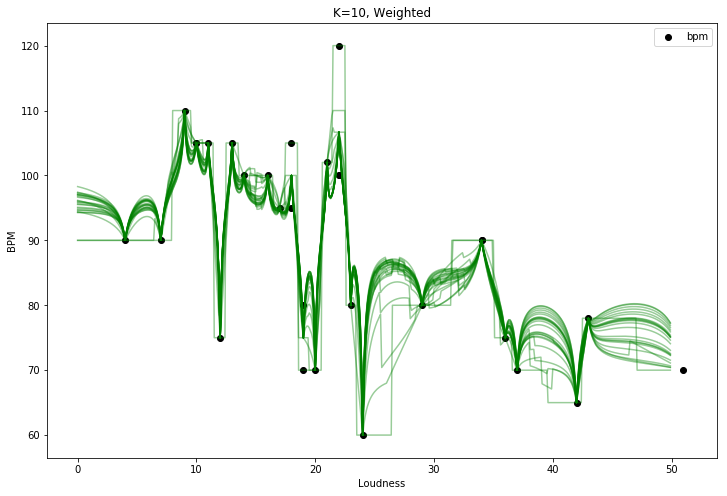

In [16]:
for n in range(1, 25):
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
    X = pd.DataFrame(music.loudness)
    Y = music.bpm
    knn_w.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    Y_ = knn_w.predict(T)

    plt.plot(T, Y_, c='g', alpha=0.4)
    
    score_w = cross_val_score(knn_w, X, Y, cv=5)
    print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2), 'Neighbors: {}'.format(n))

plt.scatter(X, Y, c='k')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

6 neighbors has the maximum score, such as it is.

### Duration Unweighted

Unweighted Accuracy: -1.36 (+/- 2.87) Neighbors: 1
Unweighted Accuracy: -0.78 (+/- 1.18) Neighbors: 2
Unweighted Accuracy: -0.34 (+/- 0.27) Neighbors: 3
Unweighted Accuracy: -0.76 (+/- 0.70) Neighbors: 4
Unweighted Accuracy: -0.70 (+/- 1.02) Neighbors: 5
Unweighted Accuracy: -0.76 (+/- 1.38) Neighbors: 6
Unweighted Accuracy: -0.66 (+/- 1.33) Neighbors: 7
Unweighted Accuracy: -0.53 (+/- 0.94) Neighbors: 8
Unweighted Accuracy: -0.41 (+/- 0.63) Neighbors: 9
Unweighted Accuracy: -0.44 (+/- 0.81) Neighbors: 10
Unweighted Accuracy: -0.40 (+/- 0.73) Neighbors: 11
Unweighted Accuracy: -0.39 (+/- 0.76) Neighbors: 12
Unweighted Accuracy: -0.42 (+/- 0.83) Neighbors: 13
Unweighted Accuracy: -0.36 (+/- 0.73) Neighbors: 14
Unweighted Accuracy: -0.39 (+/- 0.64) Neighbors: 15
Unweighted Accuracy: -0.35 (+/- 0.51) Neighbors: 16
Unweighted Accuracy: -0.33 (+/- 0.48) Neighbors: 17
Unweighted Accuracy: -0.38 (+/- 0.65) Neighbors: 18
Unweighted Accuracy: -0.37 (+/- 0.76) Neighbors: 19
Unweighted Accuracy: 

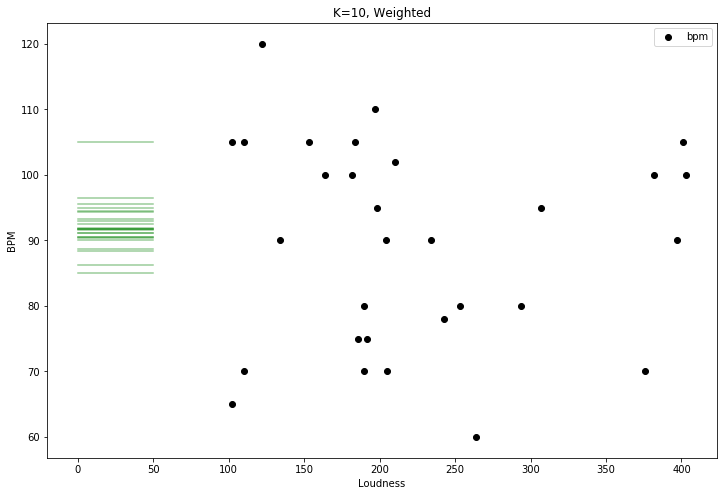

In [17]:
for n in range(1, 25):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    X = pd.DataFrame(music.duration)
    Y = music.bpm
    knn.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    Y_ = knn.predict(T)

    plt.plot(T, Y_, c='g', alpha=0.4)

    score = cross_val_score(knn, X, Y, cv=5)
    print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2), 'Neighbors: {}'.format(n))

plt.scatter(X, Y, c='k')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

#### What happened here?

This looks terrible.

### Duration Distance-Weighted

Weighted Accuracy: -1.36 (+/- 2.87) Neighbors: 1
Weighted Accuracy: -1.01 (+/- 0.99) Neighbors: 2
Weighted Accuracy: -0.88 (+/- 0.98) Neighbors: 3
Weighted Accuracy: -0.94 (+/- 0.86) Neighbors: 4
Weighted Accuracy: -0.94 (+/- 0.90) Neighbors: 5
Weighted Accuracy: -0.94 (+/- 0.93) Neighbors: 6
Weighted Accuracy: -0.89 (+/- 0.90) Neighbors: 7
Weighted Accuracy: -0.82 (+/- 0.81) Neighbors: 8
Weighted Accuracy: -0.78 (+/- 0.79) Neighbors: 9
Weighted Accuracy: -0.78 (+/- 0.77) Neighbors: 10
Weighted Accuracy: -0.78 (+/- 0.77) Neighbors: 11
Weighted Accuracy: -0.76 (+/- 0.75) Neighbors: 12
Weighted Accuracy: -0.76 (+/- 0.74) Neighbors: 13
Weighted Accuracy: -0.75 (+/- 0.76) Neighbors: 14
Weighted Accuracy: -0.75 (+/- 0.76) Neighbors: 15
Weighted Accuracy: -0.74 (+/- 0.76) Neighbors: 16
Weighted Accuracy: -0.74 (+/- 0.75) Neighbors: 17
Weighted Accuracy: -0.75 (+/- 0.74) Neighbors: 18
Weighted Accuracy: -0.76 (+/- 0.74) Neighbors: 19
Weighted Accuracy: -0.75 (+/- 0.75) Neighbors: 20
Weighted 

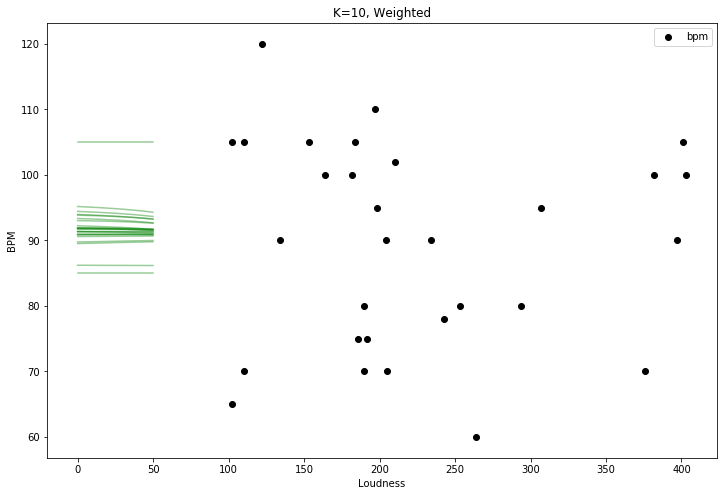

In [18]:
for n in range(1, 25):
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
    X = pd.DataFrame(music.duration)
    Y = music.bpm
    knn_w.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    Y_ = knn_w.predict(T)

    plt.plot(T, Y_, c='g', alpha=0.4)
    
    score_w = cross_val_score(knn_w, X, Y, cv=5)
    print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2), 'Neighbors: {}'.format(n))

plt.scatter(X, Y, c='k')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

#### What happened here?

In [19]:
linear_formula = 'bpm ~ loudness'
data = music

lm = smf.ols(formula=linear_formula, data=data).fit()

In [20]:
lm.params

Intercept    105.376739
loudness      -0.732576
dtype: float64

In [21]:
lm.pvalues

Intercept    3.185117e-18
loudness     1.713979e-03
dtype: float64

## Comparison with Linear Regression:

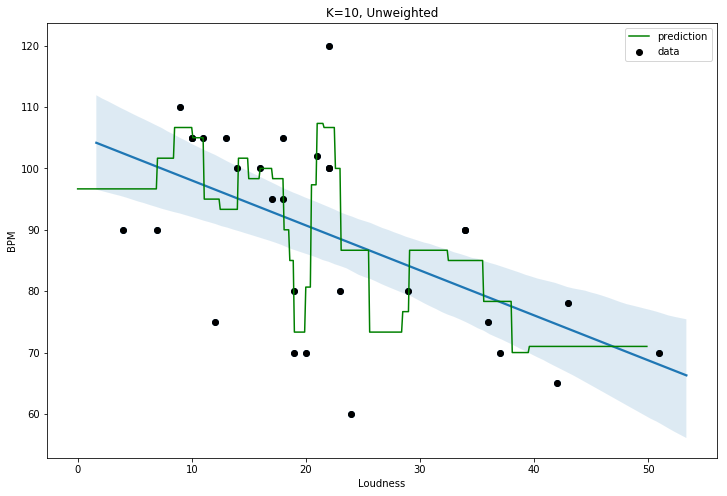

In [22]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

sns.regplot(music['loudness'], music['bpm'])

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Unweighted')
plt.show()

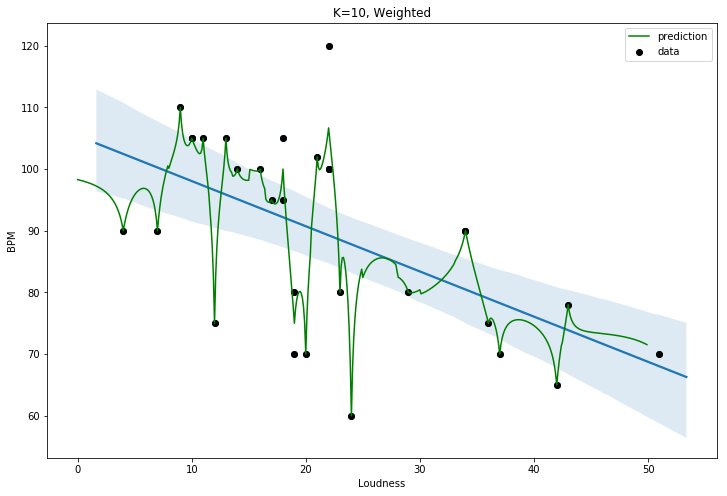

In [23]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=6, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)


sns.regplot(music['loudness'], music['bpm'])

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.title('K=10, Weighted')
plt.show()

In [24]:
# Loudness

X = pd.DataFrame(music.loudness)
y = music.bpm.values.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print('\nCoefficients: \n', reg.coef_)
print('\nIntercept: \n', reg.intercept_)
print('\nR-squared:')
print(reg.score(X, y))


Coefficients: 
 [[-0.73257558]]

Intercept: 
 [ 105.37673863]

R-squared:
0.300448456595


In [25]:
linear_formula = 'bpm ~ loudness'
data = music

lm = smf.ols(formula=linear_formula, data=data).fit()

In [26]:
lm.params

Intercept    105.376739
loudness      -0.732576
dtype: float64

In [27]:
lm.pvalues

Intercept    3.185117e-18
loudness     1.713979e-03
dtype: float64

In [28]:
# Duration

X = pd.DataFrame(music.duration)
y = music.bpm.values.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print('\nCoefficients: \n', reg.coef_)
print('\nIntercept: \n', reg.intercept_)
print('\nR-squared:')
print(reg.score(X, y))


Coefficients: 
 [[-0.00553914]]

Intercept: 
 [ 90.56837726]

R-squared:
0.00108948190818


In [29]:
linear_formula = 'bpm ~ duration'
data = music

lm = smf.ols(formula=linear_formula, data=data).fit()

In [30]:
lm.params

Intercept    90.568377
duration     -0.005539
dtype: float64

In [31]:
lm.pvalues

Intercept    1.958216e-12
duration     8.625309e-01
dtype: float64

The p-value for duration is too high for linear regression.

In [32]:
# Duration and Loudness

X = pd.DataFrame(music[['duration', 'loudness']])
y = music.bpm.values.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print('\nCoefficients: \n', reg.coef_)
print('\nIntercept: \n', reg.intercept_)
print('\nR-squared:')
print(reg.score(X, y))


Coefficients: 
 [[-0.01510129 -0.74487142]]

Intercept: 
 [ 109.01310125]

R-squared:
0.308461541348
